In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Lendo a base de dados
basepetr4 = pd.read_excel("/home/cairo/code/usp-ds-series-temporais/data/basepetr4.xlsx")

# Lendo apenas as primeiras linhas das variaveis
print(basepetr4.head())

                 Date  abertura  maxima  minimo  fechamento    volume
0 2020-01-02 16:56:00     30.51   30.70   30.31       30.70  37774500
1 2020-01-03 00:00:00     30.88   31.24   30.45       30.45  71595600
2 2020-01-07 16:56:00     30.82   30.88   30.47       30.69  32822000
3 2020-01-08 16:56:00     30.69   30.77   30.24       30.50  48215600
4 2020-01-09 16:56:00     30.47   30.62   30.25       30.40  36102700


0    30.70
1    30.45
2    30.69
3    30.50
4    30.40
Name: fechamento, dtype: float64


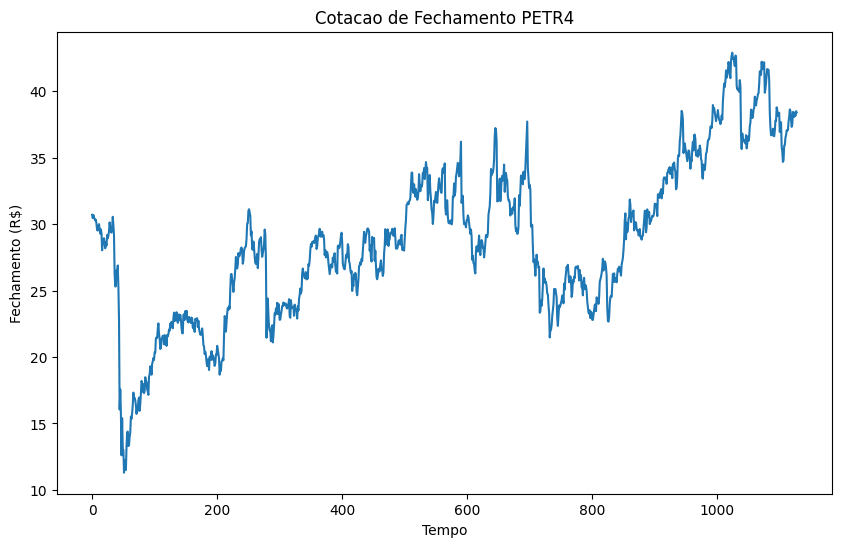

In [4]:
# Buscando a cotacoes de fechamento apenas da PETR4 e chamando os dados em petr4
petr4 = basepetr4['fechamento']

# Lendo os dados iniciais brutos
print(petr4.head())

# In[2]: Plotando o grafico bruto (selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(petr4)
plt.title('Cotacao de Fechamento PETR4')
plt.xlabel('Tempo')
plt.ylabel('Fechamento (R$)')
plt.show()

In [ ]:
# In[3]: Definindo petr4 como uma serie temporal
petr4_ts = pd.Series(petr4.values, index=pd.to_datetime(basepetr4['Date']))

# Quantas cotacoes tenho?
print(len(petr4_ts))

# In[4]: Grafico como serie de tempo usando Plotly (Selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(petr4)
plt.title('Cotacao de Fechamento PETR4 - Serie Temporal')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('Fechamento (R$//home/cairo/code/usp-ds-series-temporaisacao)')
plt.show()

In [ ]:

# In[5]: Considerando as demais informacoes da base de dados basepetr4
volume = basepetr4['volume'/home/cairo/code/usp-ds-series-temporais/home/cairo/code/usp-ds-series-temporais]
minimo = basepetr4['minimo']
abertura = basepetr4['abertura']

# In[6]: Colocando os dados/home/cairo/code/usp-ds-series-temporais em forma de uma matriz com todos os dados no conjunto
# chamado dados1
dados1 = pd.concat([petr4, volume, minimo, abertura], axis=1)
dados1.columns = ['Fechamento R$', 'Volume Financ. Neg', 'Mi­nimo R$', 
                  'Abertura R$']

# In[7]: Plotando os graficos (selecione todos os comandos)
plt.figure(figsize=(10, 6))
plt.plot(dados1['Volume Financ. Neg'])
plt.title('Volume Negociado da PETR4 - jan/2020 a jul/2024')
plt.xlabel('Tempo (02/01/20 a 16/07/24)')
plt.ylabel('Volume')
plt.show()

# In[8]: Construindo uma janela com 4 graficos - Selecione todos os comandos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(dados1['Fechamento R$'])
axs[0, 0].set_title('Cotacao de Fechamento PETR4 - jan/20 a jul/24')
axs[0, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 0].set_ylabel('R$')

axs[0, 1].plot(dados1['Mi­nimo R$'])
axs[0, 1].set_title('Cotacao Mi­nima no dia - PETR4 - jan/20 a jul/24')
axs[0, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[0, 1].set_ylabel('R$')

axs[1, 0].plot(dados1['Volume Financ. Neg'])
axs[1, 0].set_title('Volume Financeiro Negociado PETR4 - jan/20 a jul/24')
axs[1, 0].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 0].set_ylabel('Volume')

axs[1, 1].plot(dados1['Abertura R$'])
axs[1, 1].set_title('Cotacao de Abertura PETR4 - jan/20 a jul/24')
axs[1, 1].set_xlabel('Tempo (02/01/20 a 16/07/24)')
axs[1, 1].set_ylabel('R$')

plt.tight_layout()
plt.show()

### Como forma alternativa, pode-se baixar esses dados diretamente do yfinance

In [ ]:
import yfinance as yf

# Especifica o ticker do ativo desejado (neste caso, PETR4)
ticker = "PETR4.SA"

# Define o intervalo de datas desejado
start_date = "2022-01-01"
end_date = "2024-07-16"

# Obtemos os dados do Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Exibe os primeiros registros dos dados obtidos
print(data.head())

In [ ]:
# Salva os dados em um arquivo CSV
csv_file_path = "dados_petroleo.csv"
data.to_csv(csv_file_path)


In [ ]:
# In[10]: Funcao para baixar dados do Yahoo Finance (Selecionar todos os comandos)
def obter_dados(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# In[11]: Funcao para plotar os 4 graficos (Selecionar todos os comandos)
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    axs[1].plot(data['Low'], label='Mi­nima', color='green')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

# In[12]: Define o ticker, data de inicio e data de fim
ticker = "PETR4.SA"
start_date = "2022-01-01"
end_date = "2024-07-20"

# In[13]: Obtem os dados do Yahoo Finance
dados = obter_dados(ticker, start_date, end_date)

# In[14]: Plota os 4 graficos
plotar_graficos(dados)